In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import yfinance as yf
from datetime import datetime,timedelta
import regex as re

In [2]:
stock_name = "GOOG"

current_date = datetime.now()

# Format the current date as "year-month-date"
formatted_date = current_date.strftime('%Y-%m-%d')

start_date = current_date - timedelta(days=7)

start_date = start_date.strftime('%Y-%m-%d')


In [3]:
article_sentiments  = pd.read_csv("../data/stock_headlines.csv")
article_sentiments 

,Stock,Date,Time,Headlines
0,GOOG,Aug-20-23,02:55PM,Americas Tech Giants Rush to Comply With New C...
1,GOOG,Aug-19-23,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Y...
2,GOOG,Aug-18-23,08:50PM,UPDATE 2-California regulator probes crashes i...
3,GOOG,Aug-17-23,07:51PM,Netflix's Top Stories: Cloud Gaming and Strang...
4,GOOG,Aug-16-23,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure...
...,...,...,...,...
220,NVDA,Aug-19-23,10:05AM,"What Nvidia, Intel, AMD, and TSMC Stock Invest..."
221,NVDA,Aug-18-23,07:10PM,Why Are Stocks Moving Lower?
222,NVDA,Aug-17-23,06:01PM,"Are AI job wages of up to $900,000 justified?"
223,NVDA,Aug-16-23,09:02PM,NVIDIA's Top Stories: How It's Beating Competi...


In [4]:
article_sentiments_azn = article_sentiments.copy()
article_sentiments_azn.head(5)

,Stock,Date,Time,Headlines
0,GOOG,Aug-20-23,02:55PM,Americas Tech Giants Rush to Comply With New C...
1,GOOG,Aug-19-23,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Y...
2,GOOG,Aug-18-23,08:50PM,UPDATE 2-California regulator probes crashes i...
3,GOOG,Aug-17-23,07:51PM,Netflix's Top Stories: Cloud Gaming and Strang...
4,GOOG,Aug-16-23,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure...


## Data Cleaning

In [5]:
article_sentiments = article_sentiments.copy()
article_sentiments = article_sentiments[article_sentiments["Stock"]==stock_name ]
article_sentiments

,Stock,Date,Time,Headlines
0,GOOG,Aug-20-23,02:55PM,Americas Tech Giants Rush to Comply With New C...
1,GOOG,Aug-19-23,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Y...
2,GOOG,Aug-18-23,08:50PM,UPDATE 2-California regulator probes crashes i...
3,GOOG,Aug-17-23,07:51PM,Netflix's Top Stories: Cloud Gaming and Strang...
4,GOOG,Aug-16-23,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure...
5,GOOG,Aug-15-23,06:01PM,"Google to train 20,000 Nigerians in digital sk..."
6,GOOG,Aug-14-23,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key T...
7,GOOG,Aug-13-23,10:51PM,Google-backed Anthropic raises $100 million fr...


In [6]:
article_sentiments['Headlines'] = article_sentiments['Headlines'].astype(str)
#  + '---newarticle---'
article_sentiments

,Stock,Date,Time,Headlines
0,GOOG,Aug-20-23,02:55PM,Americas Tech Giants Rush to Comply With New C...
1,GOOG,Aug-19-23,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Y...
2,GOOG,Aug-18-23,08:50PM,UPDATE 2-California regulator probes crashes i...
3,GOOG,Aug-17-23,07:51PM,Netflix's Top Stories: Cloud Gaming and Strang...
4,GOOG,Aug-16-23,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure...
5,GOOG,Aug-15-23,06:01PM,"Google to train 20,000 Nigerians in digital sk..."
6,GOOG,Aug-14-23,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key T...
7,GOOG,Aug-13-23,10:51PM,Google-backed Anthropic raises $100 million fr...


In [7]:
pd.set_option("display.max_colwidth", -1)  # to display full text
article_sentiments_body = article_sentiments['Headlines']
article_sentiments_body

/var/folders/b_/qpl3sp4n7_55mr2n2w20rmh40000gn/T/ipykernel_7418/3936163720.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)  # to display full text


0    Americas Tech Giants Rush to Comply With New Curbs in Europe                    
1    Mohnish Pabrais 10 Biggest Investments in 10 Years                              
2    UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis    
3    Netflix's Top Stories: Cloud Gaming and Stranger Things                         
4    Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending
5    Google to train 20,000 Nigerians in digital skills                              
6    Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview      
7    Google-backed Anthropic raises $100 million from South Korea's SK Telecom       
Name: Headlines, dtype: object

## Save article_sentiments to txt file

In [8]:

file_name = stock_name+'.txt'
with open(file_name, 'w') as f:
    f.write(
        article_sentiments_body.to_string(header = False, index = False)
    )
     

## Perform Data Cleaning on the Text File

In [9]:
# first get all lines from file
with open(file_name, 'r') as f:
    lines = f.readlines()

# remove spaces
lines = [line.replace(' ', '') for line in lines]

# finally, write lines in the file
with open(file_name, 'w') as f:
    f.writelines(lines)

In [10]:
file_ = open(file_name, "r")

stripped_str = ""

for line in file_:
  stripped_line = line.rstrip() 
  stripped_str += stripped_line
file_.close()


with open(file_name, 'w') as f:
    f.writelines(stripped_str)
    

In [11]:
article_sentiments

,Stock,Date,Time,Headlines
0,GOOG,Aug-20-23,02:55PM,Americas Tech Giants Rush to Comply With New Curbs in Europe
1,GOOG,Aug-19-23,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Years
2,GOOG,Aug-18-23,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis
3,GOOG,Aug-17-23,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things
4,GOOG,Aug-16-23,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending
5,GOOG,Aug-15-23,06:01PM,"Google to train 20,000 Nigerians in digital skills"
6,GOOG,Aug-14-23,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview
7,GOOG,Aug-13-23,10:51PM,Google-backed Anthropic raises $100 million from South Korea's SK Telecom


In [12]:
vader = SentimentIntensityAnalyzer()
article_sentiments['neg'] = article_sentiments['Headlines'].apply(lambda title: vader.polarity_scores(title)['neg'])
article_sentiments['neu'] = article_sentiments['Headlines'].apply(lambda title: vader.polarity_scores(title)['neu'])
article_sentiments['pos'] = article_sentiments['Headlines'].apply(lambda title: vader.polarity_scores(title)['pos'])
article_sentiments['compound'] = article_sentiments['Headlines'].apply(lambda title: vader.polarity_scores(title)['compound'])
article_sentiments['Date'] = pd.to_datetime(article_sentiments['Date'])

article_sentiments.set_index('Date', inplace=True)
article_sentiments

,Stock,Time,Headlines,neg,neu,pos,compound
Date,,,,,,,
2023-08-20,GOOG,02:55PM,Americas Tech Giants Rush to Comply With New Curbs in Europe,0.000,1.000,0.000,0.0000
2023-08-19,GOOG,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Years,0.000,1.000,0.000,0.0000
2023-08-18,GOOG,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,0.000,1.000,0.000,0.0000
2023-08-17,GOOG,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things,0.000,0.795,0.205,0.2023
2023-08-16,GOOG,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.268,0.732,0.000,-0.5267
2023-08-15,GOOG,06:01PM,"Google to train 20,000 Nigerians in digital skills",0.000,1.000,0.000,0.0000
2023-08-14,GOOG,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,0.000,1.000,0.000,0.0000
2023-08-13,GOOG,10:51PM,Google-backed Anthropic raises $100 million from South Korea's SK Telecom,0.000,1.000,0.000,0.0000


In [13]:
article_sentiments.dtypes

Stock        object 
Time         object 
Headlines    object 
neg          float64
neu          float64
pos          float64
compound     float64
dtype: object

## Drop duplicates

In [14]:
article_sentiments.drop_duplicates(subset ="Headlines", 
                     keep = 'first', inplace = True)

article_sentiments

,Stock,Time,Headlines,neg,neu,pos,compound
Date,,,,,,,
2023-08-20,GOOG,02:55PM,Americas Tech Giants Rush to Comply With New Curbs in Europe,0.000,1.000,0.000,0.0000
2023-08-19,GOOG,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Years,0.000,1.000,0.000,0.0000
2023-08-18,GOOG,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,0.000,1.000,0.000,0.0000
2023-08-17,GOOG,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things,0.000,0.795,0.205,0.2023
2023-08-16,GOOG,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.268,0.732,0.000,-0.5267
2023-08-15,GOOG,06:01PM,"Google to train 20,000 Nigerians in digital skills",0.000,1.000,0.000,0.0000
2023-08-14,GOOG,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,0.000,1.000,0.000,0.0000
2023-08-13,GOOG,10:51PM,Google-backed Anthropic raises $100 million from South Korea's SK Telecom,0.000,1.000,0.000,0.0000


## Drop Empty columns

In [15]:
article_sentiments = article_sentiments.replace(to_replace='None', value=np.nan).dropna()
article_sentiments

,Stock,Time,Headlines,neg,neu,pos,compound
Date,,,,,,,
2023-08-20,GOOG,02:55PM,Americas Tech Giants Rush to Comply With New Curbs in Europe,0.000,1.000,0.000,0.0000
2023-08-19,GOOG,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Years,0.000,1.000,0.000,0.0000
2023-08-18,GOOG,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,0.000,1.000,0.000,0.0000
2023-08-17,GOOG,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things,0.000,0.795,0.205,0.2023
2023-08-16,GOOG,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.268,0.732,0.000,-0.5267
2023-08-15,GOOG,06:01PM,"Google to train 20,000 Nigerians in digital skills",0.000,1.000,0.000,0.0000
2023-08-14,GOOG,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,0.000,1.000,0.000,0.0000
2023-08-13,GOOG,10:51PM,Google-backed Anthropic raises $100 million from South Korea's SK Telecom,0.000,1.000,0.000,0.0000


In [16]:
article_sentiments.index

DatetimeIndex(['2023-08-20', '2023-08-19', '2023-08-18', '2023-08-17',
               '2023-08-16', '2023-08-15', '2023-08-14', '2023-08-13'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [17]:
article_sentiments = article_sentiments.sort_index()
article_sentiments

,Stock,Time,Headlines,neg,neu,pos,compound
Date,,,,,,,
2023-08-13,GOOG,10:51PM,Google-backed Anthropic raises $100 million from South Korea's SK Telecom,0.000,1.000,0.000,0.0000
2023-08-14,GOOG,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,0.000,1.000,0.000,0.0000
2023-08-15,GOOG,06:01PM,"Google to train 20,000 Nigerians in digital skills",0.000,1.000,0.000,0.0000
2023-08-16,GOOG,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.268,0.732,0.000,-0.5267
2023-08-17,GOOG,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things,0.000,0.795,0.205,0.2023
2023-08-18,GOOG,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,0.000,1.000,0.000,0.0000
2023-08-19,GOOG,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Years,0.000,1.000,0.000,0.0000
2023-08-20,GOOG,02:55PM,Americas Tech Giants Rush to Comply With New Curbs in Europe,0.000,1.000,0.000,0.0000


## Combine same Date articles

In [18]:
article_sentiments['news_combined'] = article_sentiments.groupby(['Date'])['Headlines'].transform(lambda x: ' '.join(x))
article_sentiments

,Stock,Time,Headlines,neg,neu,pos,compound,news_combined
Date,,,,,,,,
2023-08-13,GOOG,10:51PM,Google-backed Anthropic raises $100 million from South Korea's SK Telecom,0.000,1.000,0.000,0.0000,Google-backed Anthropic raises $100 million from South Korea's SK Telecom
2023-08-14,GOOG,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,0.000,1.000,0.000,0.0000,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview
2023-08-15,GOOG,06:01PM,"Google to train 20,000 Nigerians in digital skills",0.000,1.000,0.000,0.0000,"Google to train 20,000 Nigerians in digital skills"
2023-08-16,GOOG,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.268,0.732,0.000,-0.5267,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending
2023-08-17,GOOG,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things,0.000,0.795,0.205,0.2023,Netflix's Top Stories: Cloud Gaming and Stranger Things
2023-08-18,GOOG,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,0.000,1.000,0.000,0.0000,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis
2023-08-19,GOOG,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Years,0.000,1.000,0.000,0.0000,Mohnish Pabrais 10 Biggest Investments in 10 Years
2023-08-20,GOOG,02:55PM,Americas Tech Giants Rush to Comply With New Curbs in Europe,0.000,1.000,0.000,0.0000,Americas Tech Giants Rush to Comply With New Curbs in Europe


In [19]:
curr_stock_df = stock_name  + "_df"
file_to_download = stock_name  + "L"

In [20]:
curr_stock_df = yf.download(file_to_download, start=start_date,  end=formatted_date)
curr_stock_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-14,129.389999,131.369995,128.960007,131.330002,131.330002,24695600
2023-08-15,131.100006,131.419998,129.279999,129.779999,129.779999,19770700
2023-08-16,128.699997,130.279999,127.870003,128.699997,128.699997,25216100
2023-08-17,129.800003,131.990005,129.289993,129.919998,129.919998,33446300
2023-08-18,128.509995,129.250000,126.379997,127.459999,127.459999,30491300


## Visualize the DataFrame

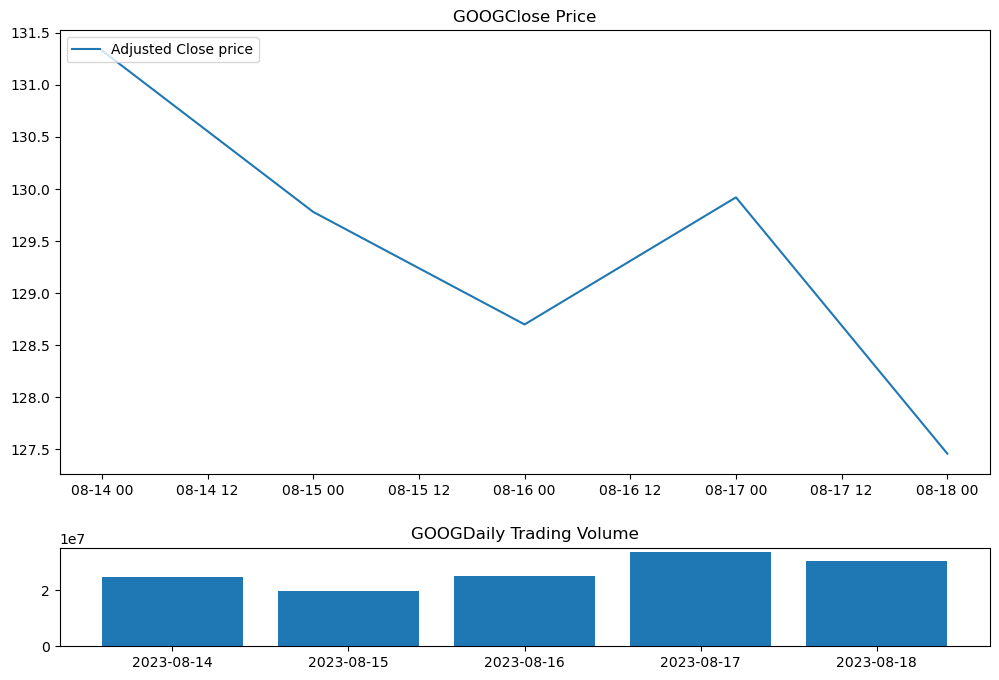

In [21]:
# Plot Adjusted Close price and Volume
title = stock_name + "Close Price"
title2 = stock_name + "Daily Trading Volume"

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4) 
top.plot(curr_stock_df.index, curr_stock_df['Adj Close'], label = 'Adjusted Close price') 
plt.title(title) 
plt.legend(loc=2) 

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4) 
bottom.bar(curr_stock_df.index, curr_stock_df["Volume"]) 
plt.title(title2) 
plt.gcf().set_size_inches(12,8) 
plt.subplots_adjust(hspace=0.75)

## Combined Data Frame

In [22]:
merge_df = article_sentiments.merge(curr_stock_df , how='inner', left_index=True, right_index=True)
merge_df

,Stock,Time,Headlines,neg,neu,pos,compound,news_combined,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,
2023-08-14,GOOG,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,0.000,1.000,0.000,0.0000,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,129.389999,131.369995,128.960007,131.330002,131.330002,24695600
2023-08-15,GOOG,06:01PM,"Google to train 20,000 Nigerians in digital skills",0.000,1.000,0.000,0.0000,"Google to train 20,000 Nigerians in digital skills",131.100006,131.419998,129.279999,129.779999,129.779999,19770700
2023-08-16,GOOG,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.268,0.732,0.000,-0.5267,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,128.699997,130.279999,127.870003,128.699997,128.699997,25216100
2023-08-17,GOOG,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things,0.000,0.795,0.205,0.2023,Netflix's Top Stories: Cloud Gaming and Stranger Things,129.800003,131.990005,129.289993,129.919998,129.919998,33446300
2023-08-18,GOOG,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,0.000,1.000,0.000,0.0000,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,128.509995,129.250000,126.379997,127.459999,127.459999,30491300


In [23]:
# Create empty list to append cleaned data from combined news column

clean_news = []

for i in range(0, len(merge_df["news_combined"])): 
    clean_news.append(re.sub("\n", ' ', merge_df["news_combined"][i])) 
    clean_news[i] = re.sub(r'[^\w\d\s\']+', '', clean_news[i]) 
    
merge_df['news_cleaned'] = clean_news
merge_df

,Stock,Time,Headlines,neg,neu,pos,compound,news_combined,Open,High,Low,Close,Adj Close,Volume,news_cleaned
Date,,,,,,,,,,,,,,,
2023-08-14,GOOG,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,0.000,1.000,0.000,0.0000,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,129.389999,131.369995,128.960007,131.330002,131.330002,24695600,Bill Ackman's Q2 2023 13F Filing Update Key Trades and Portfolio Overview
2023-08-15,GOOG,06:01PM,"Google to train 20,000 Nigerians in digital skills",0.000,1.000,0.000,0.0000,"Google to train 20,000 Nigerians in digital skills",131.100006,131.419998,129.279999,129.779999,129.779999,19770700,Google to train 20000 Nigerians in digital skills
2023-08-16,GOOG,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.268,0.732,0.000,-0.5267,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,128.699997,130.279999,127.870003,128.699997,128.699997,25216100,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending
2023-08-17,GOOG,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things,0.000,0.795,0.205,0.2023,Netflix's Top Stories: Cloud Gaming and Stranger Things,129.800003,131.990005,129.289993,129.919998,129.919998,33446300,Netflix's Top Stories Cloud Gaming and Stranger Things
2023-08-18,GOOG,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,0.000,1.000,0.000,0.0000,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,128.509995,129.250000,126.379997,127.459999,127.459999,30491300,UPDATE 2California regulator probes crashes involving GM's Cruise robotaxis


## TextBlob for sentiment Analysis 
Sentiment Analysis using TextBlob will be applied to the processed and consolidated news data. This analysis will yield both subjectivity and polarity scores. Polarity is a floating-point value that falls within the interval of [-1, 1], where 1 corresponds to a positive statement, and -1 corresponds to a negative statement. Meanwhile, subjectivity pertains to the extent to which sentences express personal opinions, emotions, or judgments, as opposed to objective factual information. Subjectivity is also represented as a floating-point value ranging from 0 to 1, with 0 indicating objectivity and 1 indicating subjectivity.


In [24]:
from textblob import TextBlob
# Create function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create new columns
merge_df['subjectivity'] = merge_df['news_cleaned'].apply(getSubjectivity)
merge_df['polarity'] = merge_df['news_cleaned'].apply(getPolarity)

In [25]:
merge_df

,Stock,Time,Headlines,neg,neu,pos,compound,news_combined,Open,High,Low,Close,Adj Close,Volume,news_cleaned,subjectivity,polarity
Date,,,,,,,,,,,,,,,,,
2023-08-14,GOOG,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,0.000,1.000,0.000,0.0000,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,129.389999,131.369995,128.960007,131.330002,131.330002,24695600,Bill Ackman's Q2 2023 13F Filing Update Key Trades and Portfolio Overview,1.000,0.000
2023-08-15,GOOG,06:01PM,"Google to train 20,000 Nigerians in digital skills",0.000,1.000,0.000,0.0000,"Google to train 20,000 Nigerians in digital skills",131.100006,131.419998,129.279999,129.779999,129.779999,19770700,Google to train 20000 Nigerians in digital skills,0.000,0.000
2023-08-16,GOOG,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.268,0.732,0.000,-0.5267,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,128.699997,130.279999,127.870003,128.699997,128.699997,25216100,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.375,-0.125
2023-08-17,GOOG,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things,0.000,0.795,0.205,0.2023,Netflix's Top Stories: Cloud Gaming and Stranger Things,129.800003,131.990005,129.289993,129.919998,129.919998,33446300,Netflix's Top Stories Cloud Gaming and Stranger Things,0.500,0.500
2023-08-18,GOOG,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,0.000,1.000,0.000,0.0000,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,128.509995,129.250000,126.379997,127.459999,127.459999,30491300,UPDATE 2California regulator probes crashes involving GM's Cruise robotaxis,0.000,0.000


In [26]:
## Feature Engineering

merge_df_label = merge_df.copy()
merge_df_label

,Stock,Time,Headlines,neg,neu,pos,compound,news_combined,Open,High,Low,Close,Adj Close,Volume,news_cleaned,subjectivity,polarity
Date,,,,,,,,,,,,,,,,,
2023-08-14,GOOG,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,0.000,1.000,0.000,0.0000,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,129.389999,131.369995,128.960007,131.330002,131.330002,24695600,Bill Ackman's Q2 2023 13F Filing Update Key Trades and Portfolio Overview,1.000,0.000
2023-08-15,GOOG,06:01PM,"Google to train 20,000 Nigerians in digital skills",0.000,1.000,0.000,0.0000,"Google to train 20,000 Nigerians in digital skills",131.100006,131.419998,129.279999,129.779999,129.779999,19770700,Google to train 20000 Nigerians in digital skills,0.000,0.000
2023-08-16,GOOG,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.268,0.732,0.000,-0.5267,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,128.699997,130.279999,127.870003,128.699997,128.699997,25216100,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.375,-0.125
2023-08-17,GOOG,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things,0.000,0.795,0.205,0.2023,Netflix's Top Stories: Cloud Gaming and Stranger Things,129.800003,131.990005,129.289993,129.919998,129.919998,33446300,Netflix's Top Stories Cloud Gaming and Stranger Things,0.500,0.500
2023-08-18,GOOG,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,0.000,1.000,0.000,0.0000,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,128.509995,129.250000,126.379997,127.459999,127.459999,30491300,UPDATE 2California regulator probes crashes involving GM's Cruise robotaxis,0.000,0.000


In [27]:
# "1" when Adj Close value rose or stayed as the same;
# "0" when  Adj Close value decreased.
merge_df_label['Adj Close Next'] = merge_df_label['Adj Close'].shift(-1)
merge_df_label['Label'] = merge_df_label.apply(lambda x: 1 if (x['Adj Close Next']>= x['Adj Close']) else 0, axis =1)
merge_df_label.fillna(1, inplace=True)
merge_df_label[['Adj Close', 'Adj Close Next', 'Label']].head(5)

,Adj Close,Adj Close Next,Label
Date,,,
2023-08-14,131.330002,129.779999,0
2023-08-15,129.779999,128.699997,0
2023-08-16,128.699997,129.919998,1
2023-08-17,129.919998,127.459999,0
2023-08-18,127.459999,1.000000,0


In [28]:
# Show Adj Close Next and Label with Date columns for better visualization

merge_df_label_adj_nxt = merge_df_label[['Adj Close Next', 'Label']]
merge_df_label_adj_nxt

,Adj Close Next,Label
Date,,
2023-08-14,129.779999,0
2023-08-15,128.699997,0
2023-08-16,129.919998,1
2023-08-17,127.459999,0
2023-08-18,1.000000,0


In [29]:
# Merge DataFrames on date
merge3 = merge_df.merge(merge_df_label_adj_nxt, how='inner', left_index=True, right_index=True)
merge3

,Stock,Time,Headlines,neg,neu,pos,compound,news_combined,Open,High,Low,Close,Adj Close,Volume,news_cleaned,subjectivity,polarity,Adj Close Next,Label
Date,,,,,,,,,,,,,,,,,,,
2023-08-14,GOOG,06:02PM,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,0.000,1.000,0.000,0.0000,Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview,129.389999,131.369995,128.960007,131.330002,131.330002,24695600,Bill Ackman's Q2 2023 13F Filing Update Key Trades and Portfolio Overview,1.000,0.000,129.779999,0
2023-08-15,GOOG,06:01PM,"Google to train 20,000 Nigerians in digital skills",0.000,1.000,0.000,0.0000,"Google to train 20,000 Nigerians in digital skills",131.100006,131.419998,129.279999,129.779999,129.779999,19770700,Google to train 20000 Nigerians in digital skills,0.000,0.000,128.699997,0
2023-08-16,GOOG,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.268,0.732,0.000,-0.5267,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,128.699997,130.279999,127.870003,128.699997,128.699997,25216100,Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending,0.375,-0.125,129.919998,1
2023-08-17,GOOG,07:51PM,Netflix's Top Stories: Cloud Gaming and Stranger Things,0.000,0.795,0.205,0.2023,Netflix's Top Stories: Cloud Gaming and Stranger Things,129.800003,131.990005,129.289993,129.919998,129.919998,33446300,Netflix's Top Stories Cloud Gaming and Stranger Things,0.500,0.500,127.459999,0
2023-08-18,GOOG,08:50PM,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,0.000,1.000,0.000,0.0000,UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis,128.509995,129.250000,126.379997,127.459999,127.459999,30491300,UPDATE 2California regulator probes crashes involving GM's Cruise robotaxis,0.000,0.000,1.000000,0


In [30]:
keep_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'subjectivity', 'polarity', 'compound', 'neg','neu','pos','Label']
df =  merge3[keep_columns]
df

,Open,High,Low,Close,Adj Close,Volume,subjectivity,polarity,compound,neg,neu,pos,Label
Date,,,,,,,,,,,,,
2023-08-14,129.389999,131.369995,128.960007,131.330002,131.330002,24695600,1.000,0.000,0.0000,0.000,1.000,0.000,0
2023-08-15,131.100006,131.419998,129.279999,129.779999,129.779999,19770700,0.000,0.000,0.0000,0.000,1.000,0.000,0
2023-08-16,128.699997,130.279999,127.870003,128.699997,128.699997,25216100,0.375,-0.125,-0.5267,0.268,0.732,0.000,1
2023-08-17,129.800003,131.990005,129.289993,129.919998,129.919998,33446300,0.500,0.500,0.2023,0.000,0.795,0.205,0
2023-08-18,128.509995,129.250000,126.379997,127.459999,127.459999,30491300,0.000,0.000,0.0000,0.000,1.000,0.000,0


## Model Prediction

In [31]:
# Split data into 80% training and 20% testing data sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

X = df
X = np.array(X.drop(['Label'], 1))
y = np.array(df['Label'])

split = int(0.8*len(df))
X_train = X[0:split]
y_train = y[0:split]

X_test = X[split:]
y_test = y[split:]
model = LinearDiscriminantAnalysis().fit(X_train, y_train)
predictions = model.predict(X_test)
X_train = scale(X_train)
X_test = scale(X_test)

/var/folders/b_/qpl3sp4n7_55mr2n2w20rmh40000gn/T/ipykernel_7418/3537857539.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(X.drop(['Label'], 1))


In [32]:
# Show model metrics 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/opt/anaconda3/envs/ameya/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/ameya/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/ameya/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/ameya/lib/

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels, class_names=["Decrease", "Increase"],
                          normalize=False, title=None, cmap=plt.cm.coolwarm):
    """
    Plots a confusion matrix for binary classification results.
    
    Parameters:
        true_labels (array-like): True labels of the samples.
        predicted_labels (array-like): Predicted labels of the samples.
        class_names (list): Names of the classes, default is ["Decrease", "Increase"].
        normalize (bool): If True, the confusion matrix will be normalized.
        title (str): Title for the plot.
        cmap: Colormap for the plot.
        
    Returns:
        ax: Matplotlib Axes object containing the confusion matrix plot.
    """
    
    # Compute the confusion matrix
    confusion = confusion_matrix(true_labels, predicted_labels)
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Display the color bar
    im = ax.imshow(confusion, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Set axis labels and title
    ax.set(xticks=np.arange(confusion.shape[1]),
           yticks=np.arange(confusion.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title=title,
           ylabel='Actual',
           xlabel='Predicted')
    
    # Rotate and align the x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Format for displaying values
    format_string = '.2f' if normalize else 'd'
    threshold = confusion.max() / 1.5
    
    # Display the values in the cells
    for i in range(confusion.shape[0]):
        for j in range(confusion.shape[1]):
            cell_value = format(confusion[i, j], format_string)
            color = "snow" if confusion[i, j] > threshold else "orange"
            ax.text(j, i, cell_value,
                    ha="center", va="center",
                    color=color,
                    size=12)
    
    # Turn off the grid
    ax.grid(False)
    
    # Adjust the layout
    fig.tight_layout()
    
    return ax



--------------- LinearDiscriminantAnalysis ---------------



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

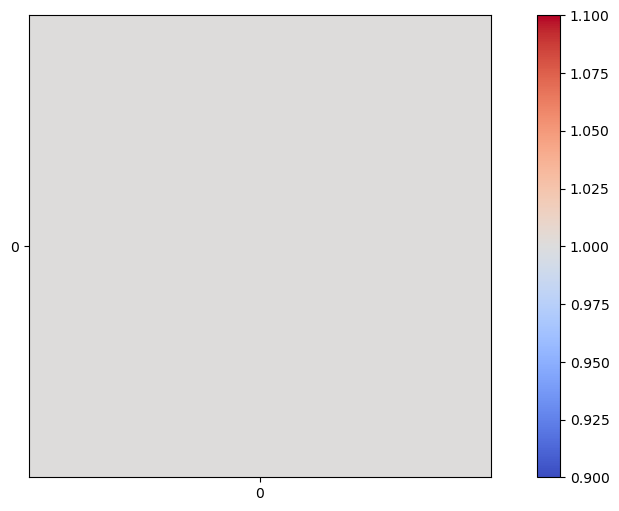

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def test_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    print('\n' + '-' * 15, model.__class__.__name__, '-' * 15 + '\n')
    
    # Plot confusion matrix
    plot_confusion_matrix(model.predict(X_test), y_test, title="Confusion Matrix")
    np.set_printoptions(precision=1)
    plt.show()
    
    # Final Classification Report
    report = classification_report(model.predict(X_test), y_test, target_names=['Decrease', 'Increase'])
    print(report)

def start():
    models = {
        'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
        'SVM Classification': SVC(),
        'SGDClassifier': SGDClassifier(loss="hinge", penalty="l2", max_iter=100),
        'GaussianProcessClassifier': GaussianProcessClassifier(),
        'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
    }

    # Load your data and split it into X_train, X_test, y_train, y_test
    
    for model_name, model in models.items():
        test_model(model, X_train, X_test, y_train, y_test)

start()

In [38]:
# Before calling plot_confusion_matrix, add these lines:
print("Predicted labels shape:", model.predict(X_test).shape)
print("True labels shape:", y_test.shape)
print("Class names:",  ['Decrease', 'Increase'])

Predicted labels shape: (1,)
True labels shape: (1,)
Class names: ['Decrease', 'Increase']
